<h1>Bayes' Theorem & Posterior Probability</h1>

<br>

<h3><font color='grey'>Buidling Posterior Probability</font></h3>

<ul>
    <li><b><code>Grid Approximation</code></b> - Developing a matrix of outcomes <code>n_conv</code> versus probabilities <code>p_conv</code> lays the foundations for analysing distribution. Each <code>n_conv</code> outcome will consist of 100 rows of different potential probabilities (0-100%). With the combinations neatly arranged, the <code>likelihood</code> of a particular combination can be computed further below.</li>
    <br>
    <li><b><code>Prior</code></b> - What do we understand about probability before seeing any data? This is domain knowledge which can be factored into a model, in the form of a probability, or estimation. If no knowledge is held, then <code>uniform</code> distribution is appropriate, i.e. since we know nothing, every outcome has the same probability.</li>
    <br>
    <li><b><code>Likelihood</code></b> - Computes the likelihood of observing <code>n_conv</code> number of conversions given the probability of conversion is <code>p_conv</code>. Since conversion is a binary outcome, we model model <code>binomial distribution</code> using <code>pmf</code> (probability mass function, akin to a pdf for discrete outcomes). This results in the <code>likelihood</code> field, which illustrates <i>there's a 100% likelihood of observing 0 conversions when probability of conversion is 0%</i>, likelwise <i>there's a 37% likelihood of observing 0 conversions when probability of conversion is 1%</i>.</li>
    <br>
    <li><b><code>Posterior Probability</code></b> - What we know about the model having calculated likelihood and factored in our prior knoweldge. This the continuation of Bayes' Theorem, which is the multiplication of <code>prior</code> and <code>likelihood</code>. The resultant <code>p_post</code> is scaled so that the values total to 1 and, therefore, represent a true distribution.</li>
</ul>

In [47]:
# libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from scipy.stats import binom

# style
from ipynb.fs.full.Style_sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# ignore
import warnings
warnings.filterwarnings('ignore')

# sample & conversions
s = 100
cvr = 0.33

# build grid
n_conv = np.arange(0, s+1, 1)
p_conv = np.arange(0, 1.01, 0.01)
df = pd.DataFrame([x, y] for x in n_conv for y in p_conv)
df.columns = ['n_conv', 'p_conv']

# prior
df['prior'] = uniform.pdf(df['p_conv'])

# likelihood
df['likelihood'] = binom.pmf(df['n_conv'], s, df['p_conv'])

# posterior
df['p_post'] = df['prior'] * df['likelihood']
df['p_post'] /= df['p_post'].sum()

# show
df

,n_conv,p_conv,prior,likelihood,p_post
0,0,0.00,1.0,1.000000,0.009901
1,0,0.01,1.0,0.366032,0.003624
2,0,0.02,1.0,0.132620,0.001313
3,0,0.03,1.0,0.047553,0.000471
4,0,0.04,1.0,0.016870,0.000167
...,...,...,...,...,...
10196,100,0.96,1.0,0.016870,0.000167
10197,100,0.97,1.0,0.047553,0.000471
10198,100,0.98,1.0,0.132620,0.001313
10199,100,0.99,1.0,0.366032,0.003624


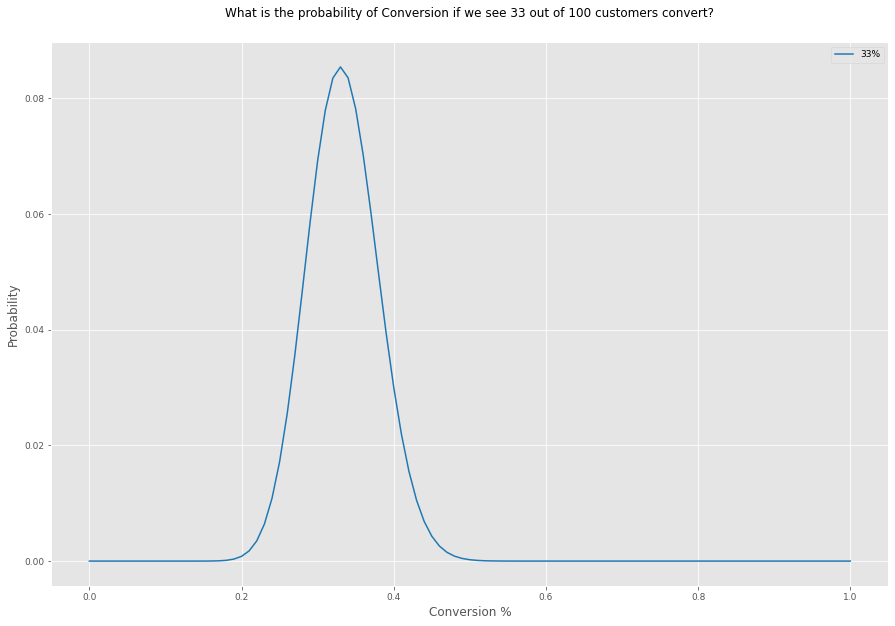

In [48]:
# subset 33
df_33 = df[df['n_conv']==s*cvr]
df_33['p_post'] /= df_33['p_post'].sum()

# viz_line
def viz_line(ax, data, x, y, c, lb, ttl, xlb, ylb):
    sns.lineplot(ax=ax, data=data, x=x, y=y, color=c, label=lb)
    ax.set_title(ttl)
    ax.set_xlabel(xlb)
    ax.set_ylabel(ylb)
    ax.legend()
    return ax

# viz
fig, ax_1 = plt.subplots(1, 1, figsize=(15,10))

ttl = 'What is the probability of Conversion if we see 33 out of 100 customers convert?'
xlb = 'Conversion %'
ylb = 'Probability'
lb = '33%'

viz_line(ax_1, df_33, 'p_conv', 'p_post', palette_paired[1], lb, ttl, xlb, ylb)

plt.show()

In [51]:
# new sample
cvr2 = 0.35

# reconfig prior & likelihood
df['prior'] = df['p_post']
df['likelihood'] = binom.pmf(df['n_conv'], s, df['p_conv'])
df['p_post'] = df['prior'] * df['likelihood']
df['p_post'] /= df['p_post'].sum()

# df_700
df_35 = df[df['n_conv']==s*cvr2]
df_35['p_post'] /= df_35['p_post'].sum()
df_35

,n_conv,p_conv,prior,likelihood,p_post
3535,35,0.00,0.000000e+00,0.000000e+00,0.000000e+00
3536,35,0.01,3.208397e-88,5.698078e-44,4.630516e-128
3537,35,0.02,1.012051e-67,1.012012e-33,2.594184e-97
3538,35,0.03,5.656218e-56,7.565670e-28,1.083893e-79
3539,35,0.04,8.187900e-48,9.102708e-24,1.887800e-67
...,...,...,...,...,...
3631,35,0.96,1.260370e-130,3.571358e-65,1.140103e-191
3632,35,0.97,1.491068e-146,3.884481e-73,1.467044e-215
3633,35,0.98,3.921368e-169,1.992063e-84,1.978579e-249
3634,35,0.99,5.863764e-208,7.703225e-104,1.144094e-307


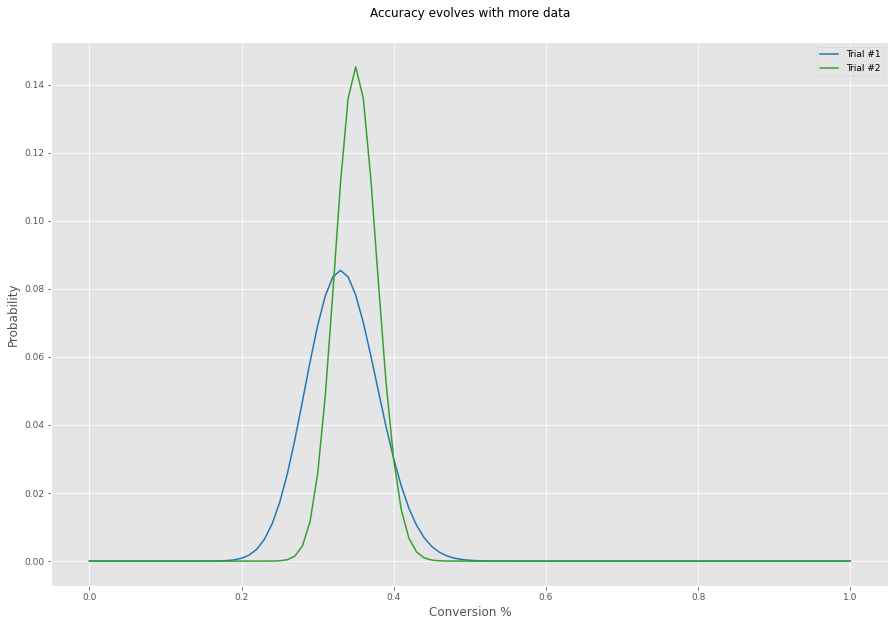

In [52]:
fig, ax_1 = plt.subplots(1, 1, figsize=(15,10))

ttl = 'Accuracy evolves with more data'
xlb = 'Conversion %'
ylb = 'Probability'
lb_1 = 'Trial #1'
lb_2 = 'Trial #2'

viz_line(ax_1, df_33, 'p_conv', 'p_post', palette_paired[1], lb_1, ttl, xlb, ylb,)
viz_line(ax_1, df_35, 'p_conv', 'p_post', palette_paired[3], lb_2, ttl, xlb, ylb,)

plt.show()